### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

+ **Independent variable: congruency OR incongruent pair of words presented to the subject.**
+ **Dependent variable: Time to complete the test.**

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### Hypothesis Testing

Null hypothesis **(H0)**states that there are no differences between the response time for congruent words (Congruent) and incongruent words (Incongruent). The mean difference between paired observations is zero.

Alternative hypothesis **(H1)**states that there are difference between the response time for congruent words and incongruent words.

**H0** :**μ_congruent = μ_incongruent**

**H1** :**μ_congruent ≠ μ_incongruent**

where 

**μ_congruent** is the population mean of response time for congruent words.

**μ_incongruent** is the population mean of response time for incongruent words.

#### **Paired Samples t-test**:
#### **Assumption**:
In a paired sample t-test, the observations are defined as the differences between two sets of values(ie: response time for congruent words and incongruent words,respectively.) and each assumption refers to these differences, not the original data values. The paired sample t-test has four main assumptions:
+ The dependent variable (ie: Time to complete the test) must be continuous (interval/ratio).
+ The observations are independent of one another.
+ The dependent variable (ie: Time to complete the test) should be approximately normally distributed.
+ The dependent variable (ie: Time to complete the test) should not contain any outliers.

#### **Procedure**:
The procedure for a paired sample t-test can be examined in four steps:

1. Calculate the sample mean.
2. Calculate the sample standard deviation.
3. Calculate the test statistic.
4. Calculate the probability of observing the test statistic under the null hypothesis. This value is obtained by comparing t to a t-distribution with (n − 1) degrees of freedom. 

#### **Analysis of Statistical Significance**:

By observing the p-value. which gives the probability of observing the test results under the null hypothesis. Thus, a low p-value indicates decreased support for the null hypothesis. 
In summary, If we obtain a significant result, we can reject the null hypothesis and accept the alternative hypothesis. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

Import libraries

In [1]:
# Perform the analysis here

import pandas as pd
import numpy as np
from math import sqrt

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_context('notebook', font_scale = 1.5)
sns.set_style("white")

In [2]:
import os
cwd = os.getcwd()

In [3]:
cwd

'/Users/irene/Desktop/DAFD Office/Project_5'

In [4]:
# Load dataset, read into pandas dataframe and add subject column
import csv
stroop_data = pd.read_csv('stroopdata.csv')
stroop_data['Subject'] = stroop_data.index + 1
stroop_data.head()

,Congruent,Incongruent,Subject
0,12.079,19.278,1
1,16.791,18.741,2
2,9.564,21.214,3
3,8.630,15.687,4
4,14.669,22.803,5


In [5]:
#Add column to show the difference between response time for congruent and incongruent words
stroop_data['Difference'] = stroop_data['Congruent'] - stroop_data['Incongruent']
stroop_data.head()

,Congruent,Incongruent,Subject,Difference
0,12.079,19.278,1,-7.199
1,16.791,18.741,2,-1.950
2,9.564,21.214,3,-11.650
3,8.630,15.687,4,-7.057
4,14.669,22.803,5,-8.134


In [6]:
# Some descriptive statistics regarding this dataset
stroop_data[['Congruent', 'Incongruent', 'Difference']].describe()

,Congruent,Incongruent,Difference
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,-7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,-21.919000
25%,11.895250,18.716750,-10.258500
50%,14.356500,21.017500,-7.666500
75%,16.200750,24.051500,-3.645500
max,22.328000,35.255000,-1.950000


#### Findings:
+ Congruent sample has mean = 14.051s and standard deviation = 3.559s.
+ Incongruent sample has mean= 22.016s and standard deviation σI = 4.797s.
+ We found that the mean, median, minimum and maximum response time for incongruent words are higher than the congruent words. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

**Histogram and Rug plot**

/Users/irene/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/irene/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


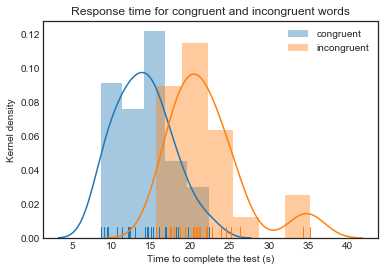

In [7]:
#Distribution of time response to Congruent and InCongruent Words
#with a kernel density estimate,histogram and rug plot
sns.distplot(stroop_data['Congruent'], rug = True, label = "congruent");
sns.distplot(stroop_data['Incongruent'], rug = True, label = "incongruent");
plt.xlabel("Time to complete the test (s)");
plt.ylabel("Kernel density");
plt.title("Response time for congruent and incongruent words");
plt.legend();

#### Observations of Histogram and Rug plot
+ Both dependent variables (ie: Time to complete the test in congruent and incongruent) are continuous.
+ Both dependent variables (ie: Time to complete the test in congruent and incongruent) have been approximately normally distributed, but there is another small peak in incongruent. So  will check is it an outlier later.  
+ The observations are independent of one another.

**Boxplot**

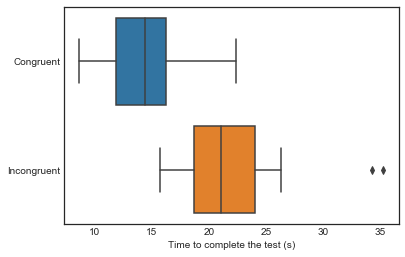

In [8]:
sns.boxplot(data=stroop_data[['Congruent', 'Incongruent']], orient="h");
plt.xlabel("Time to complete the test (s)");

#### Observations in Box-plot
+ The median of time to complete the test at incongruent is higher than congruent task.
+ Time to complete the test in incongruent contain outliers at 33-35 s.

In [9]:
# size of the dataset
stroop_data.shape

(24, 4)

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

### Paired t-test



**Degree of freedom df = n-1, where n= 24, so df =23**


In [11]:
n=24
df=23
# Calculte the mean of each test
mean_congurent = stroop_data['Congruent'].mean()
mean_incongurent = stroop_data['Incongruent'].mean()
# Computes mean of the difference
mean_of_the_differences = stroop_data['Difference'].mean() 
# Computes std deviation of the difference 
stdev_of_the_differences = stroop_data['Difference'].std() 
print("mean of congurent =", mean_congurent)
print("mean of incongurent =", mean_incongurent)
print("mean of the differences =", mean_of_the_differences)
print("standard deviation of the differences =", stdev_of_the_differences)

mean of congurent = 14.051125000000004
mean of incongurent = 22.01591666666667
mean of the differences = -7.964791666666667
standard deviation of the differences = 4.864826910359056


In [16]:
#t-statistic
se = stdev_of_the_differences/float(sqrt(24))
t_statistic = mean_of_the_differences/float(se)
print("t-statistic =", t_statistic)

t-statistic = -8.020706944109957


t-statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the critical values of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis.

### t-critical values for two-tailed t-test
Significance level(α ) is the criterion used for rejecting null hypothesis. Statisticians have commonly used either the 0.05 level (5% chance) or the 0.01 level (1% chance).

**Confidence level = 1 - significance level**

Since we hypothesized the possibility of relationship in both directions, we will use a two-tailed test to test our hypothesis. If we are using a significance level of 0.05, two-tailed t-test allocates 0.025 in each tail. Both left and right area are 2.5% of the total area under the curve.

**(μ_congruent -  μ_incongruent)** is considered significantly different from **μ0** if the test statistic is in the top 2.5% or bottom 2.5% of its probability distribution, resulting in a p-value less than 0.05.

In [17]:
from scipy import stats
# t-critical values at alpha = 0.05 and df = 20 for two-tailed t-test, q = Quantile to check
t_critical_values = (stats.t.ppf(q=0.025,df=23), stats.t.ppf(q=0.975,df=23))  
print ("t-critical values at alpha of 0.05 for two-tailed t-test:", t_critical_values)      

t-critical values at alpha of 0.05 for two-tailed t-test: (-2.0686576104190411, 2.0686576104190406)


We calculated t-statistic is smaller than the critical t-value, it concludes that there is a statistically significant difference between the two populations. Therefore, we reject the null hypothesis that there is statistically significant difference between two populations.

In [18]:
pvalue = stats.t.cdf(x = t_statistic, df = 23 ) * 2 
print("p-value : p =", pvalue)

p-value : p = 4.10300058571e-08


where p-value <0.05

### Confidence intervals

Confidence intervals (CI) is a type of interval estimate, computed from the statistics of the observed data, that might contain the true value of an unknown population parameter. It is common to report 95% confidence intervals.

### Confidence Level
+ The percentage of time that a statistical result would be correct if we took numerous random samples.
+ There is no such thing as a 100% confidence level, since this would require a sample size as large as the entire population. 
+ The most commonly selected confidence levels are 95% or 99%.
+ Confidence level is also closely related to the statistical term α (Alpha), which is the probability of creating a Type 1 error:
 **Confidence Level = 1 – α**
 
+ A Type 1 error is when we incorrectly conclude that an experiment was successful in detecting an improvement, but it actually was not. Obviously, this could be a serious and costly mistake.
+ The greater the confidence level, the lower the α value, so an adequate confidence level is an important component in any meaningful testing.

#### In this project, I selected confidence levels 95% for analysis.

In [19]:
#95% CI
stats.norm.interval(0.95, loc = mean_of_the_differences, scale = se)

(-9.9110920264491931, -6.0184913068841404)

### Observation

We observed that
+ t-Statistic is smaller than t-critical value, in the critical region with p-value < 0.05.
+ We reject the Null Hypothesis with a 95% Confidence level and conclude that there is a significant difference in congruent and incongruent tasks.
+ The results match up with our observations and expectations that there is indeed a statistically significant difference in the response time to perform the incongruent test compared to the congruent test.
+ It takes longer time to complete incongruent task.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!


+ As habitual readers, we encounter and comprehend words on such a persistent basis that the reading occurs almost effortlessly, whereas declaration of a color requires more cognitive effort. 
+ When there is a conflict between these two sources of information, our cognitive load is increased, and our brains have to work harder to resolve the required difference. 
+ Performing these tasks (preventing reading, processing word color, and resolving information conflict) ultimately slows down our responses, and makes the task take longer.

#### Alternative task
**Emotional Stroop Test**
+ Participants complete both the original Stroop, and a version which has both neutral and emotionally charged words. The resulting text features words such as “pain” or “joy” amongst everyday words. 
+ Research has shown that anxious people were likely to experience more interference (i.e. more time spent declaring word color) with emotionally charged words, suggesting a preponderance of the emotional word content.

### Reference:
https://imotions.com/blog/the-stroop-effect/